In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2024-06-04 08:23:50--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 198.23.119.245
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|198.23.119.245|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite’

m4_survey_data.sqli 100%[===================>]  34.98M  43.0MB/s    in 0.8s    

2024-06-04 08:23:51 (43.0 MB/s) - ‘m4_survey_data.sqlite’ saved [36679680/36679680]



In [2]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite")

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

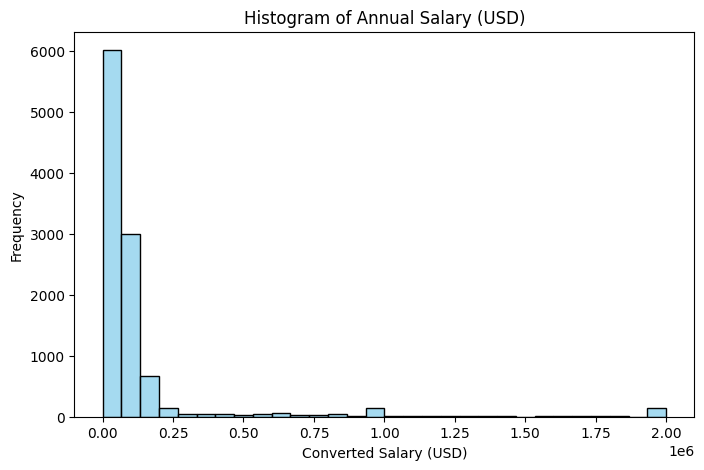

In [19]:
#histogram for column ConvertedComp
QUERY = """
SELECT ConvertedComp
FROM master
"""

df = pd.read_sql_query(QUERY, conn)

plt.figure(figsize=(8, 5))
sns.histplot(df['ConvertedComp'], bins=30, color='skyblue')
plt.title('Histogram of Annual Salary (USD)')
plt.xlabel('Converted Salary (USD)')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

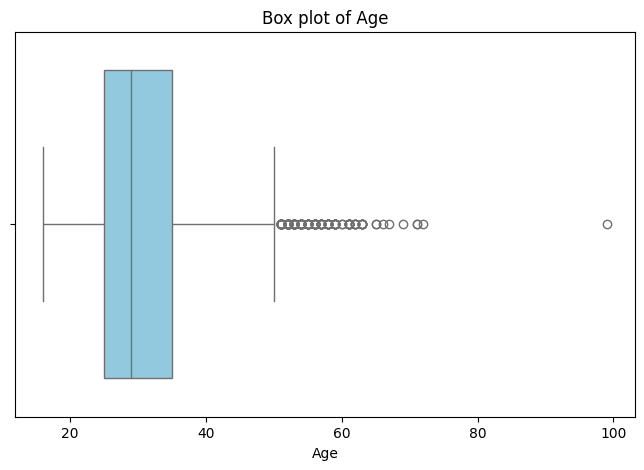

In [20]:
QUERY = """
SELECT Age
FROM master
"""

df = pd.read_sql_query(QUERY, conn)

plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Age'].dropna(), vert=False, color='skyblue')
plt.title('Box plot of Age')
plt.xlabel('Age')
plt.grid(False)
plt.show()

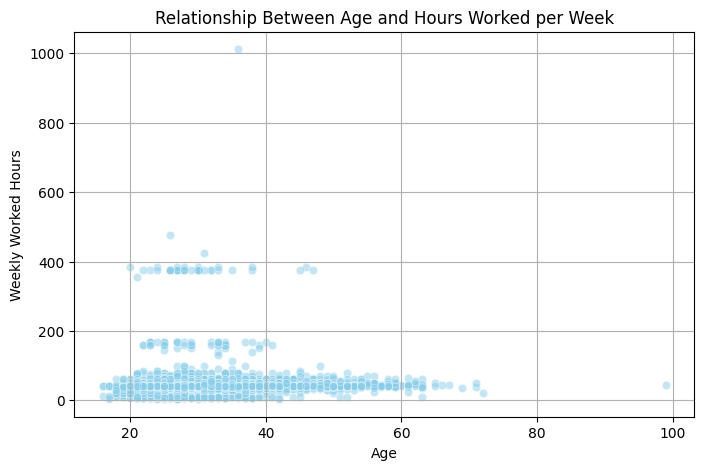

In [21]:
#scatter plot for Age and WorkWeekHrs columns
QUERY = """
SELECT Age, WorkWeekHrs
FROM master
"""

df = pd.read_sql_query(QUERY, conn)

plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Age'], y=df['WorkWeekHrs'], alpha=0.5, color='skyblue')
plt.title('Relationship Between Age and Hours Worked per Week')
plt.xlabel('Age')
plt.ylabel('Weekly Worked Hours')
plt.grid(True)
plt.show()

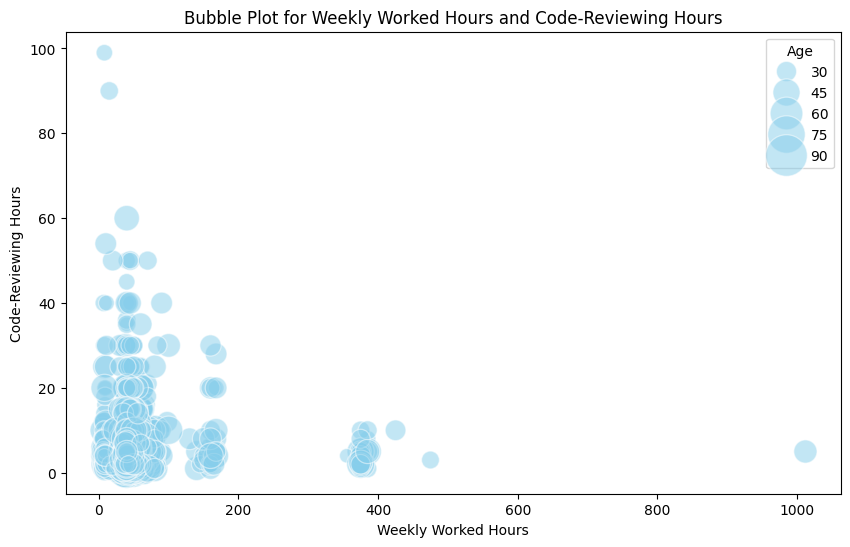

In [14]:
#bubble plot
QUERY = """
SELECT Age, WorkWeekHrs, CodeRevHrs
FROM master
"""

df = pd.read_sql_query(QUERY, conn)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='WorkWeekHrs', y='CodeRevHrs', size='Age', sizes=(50,1000), data=df, alpha=0.5, color='skyblue')

plt.title('Bubble Plot for Weekly Worked Hours and Code-Reviewing Hours')
plt.xlabel('Weekly Worked Hours')
plt.ylabel('Code-Reviewing Hours')

plt.show()

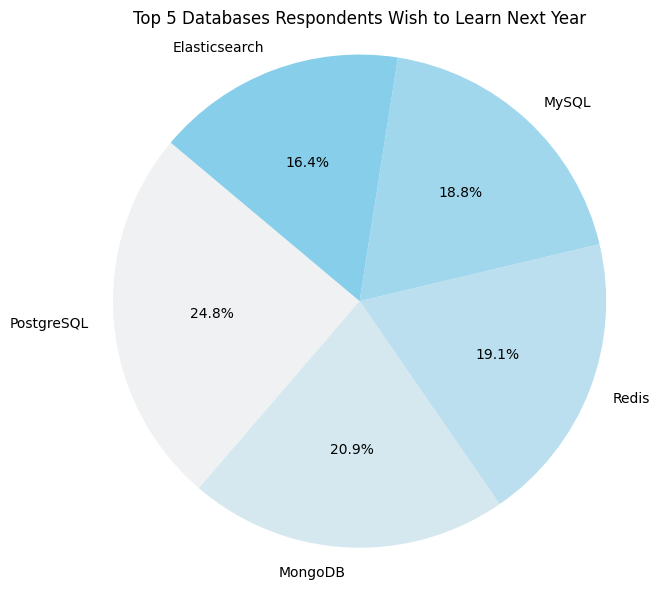

In [13]:
#pie chart
QUERY = """
SELECT *
FROM DatabaseDesireNextYear
"""
df = pd.read_sql_query(QUERY, conn)

database_counts = df['DatabaseDesireNextYear'].value_counts().head(5)

custom_colors = sns.light_palette("skyblue", n_colors=len(database_counts))

plt.figure(figsize=(7, 7))
plt.pie(database_counts, labels=database_counts.index, autopct='%1.1f%%', startangle=140, colors=custom_colors)

plt.title('Top 5 Databases Respondents Wish to Learn Next Year')

plt.axis('equal')
plt.show()

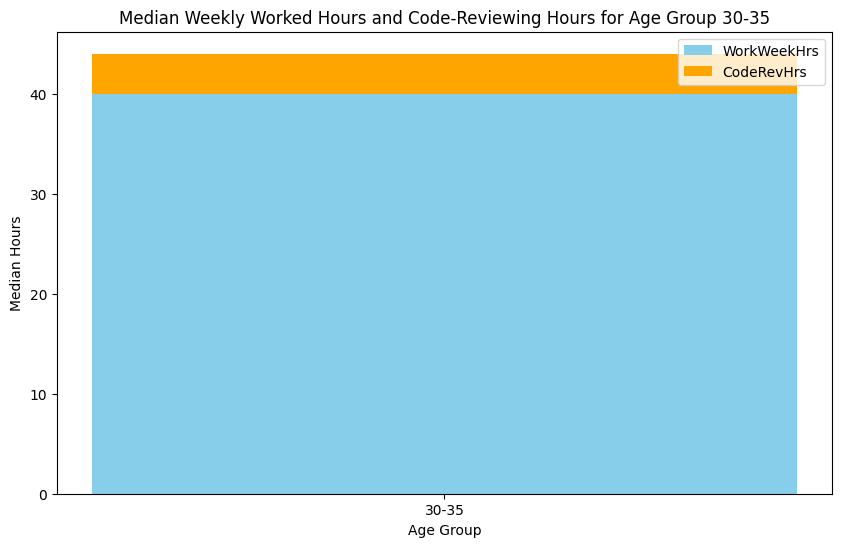

In [12]:
#stacked chart
QUERY = """
SELECT Age, WorkWeekHrs, CodeRevHrs
FROM master
"""

df = pd.read_sql_query(QUERY, conn)
df_filtered = df[(df['Age'] >= 30) & (df['Age'] <= 35)]

median_work_week_hrs = df_filtered['WorkWeekHrs'].median()
median_code_rev_hrs = df_filtered['CodeRevHrs'].median()

age_group = ['30-35']
work_week_hrs = [median_work_week_hrs]
code_rev_hrs = [median_code_rev_hrs]

plt.figure(figsize=(10, 6))
plt.bar(age_group, work_week_hrs, label='WorkWeekHrs', color='skyblue')
plt.bar(age_group, code_rev_hrs, bottom=work_week_hrs, label='CodeRevHrs', color='orange')

plt.xlabel('Age Group')
plt.ylabel('Median Hours')
plt.title('Median Weekly Worked Hours and Code-Reviewing Hours for Age Group 30-35')
plt.legend()
plt.show()

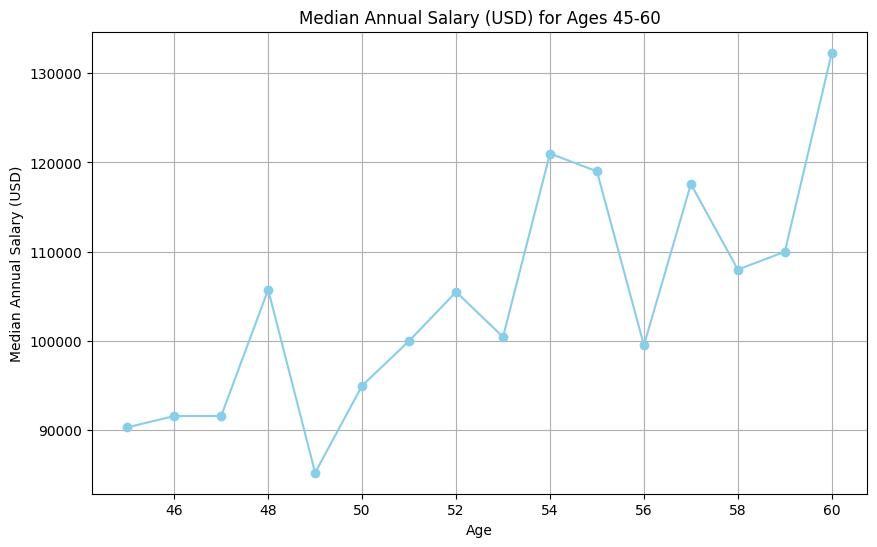

In [16]:
#line chart for ConvertedComp
QUERY = """
SELECT Age, ConvertedComp
FROM master
"""

df = pd.read_sql_query(QUERY, conn)

df_filtered = df[(df['Age'] >= 45) & (df['Age'] <= 60)]

median_converted_comp = df_filtered.groupby('Age')['ConvertedComp'].median()

plt.figure(figsize=(10, 6))
plt.plot(median_converted_comp.index, median_converted_comp.values, marker='o', color='skyblue')

plt.xlabel('Age')
plt.ylabel('Median Annual Salary (USD)')
plt.title('Median Annual Salary (USD) for Ages 45-60')

plt.grid(True)
plt.show()

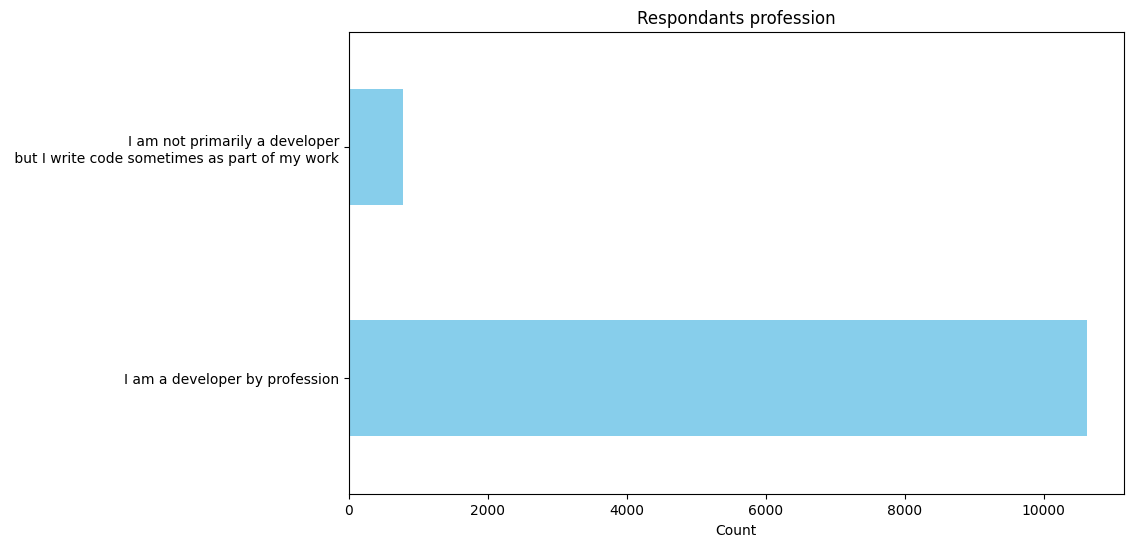

In [22]:
#bar chart for distribution of MainBranch
QUERY = """
SELECT MainBranch
FROM master
"""

df = pd.read_sql_query(QUERY, conn)

branch_counts = df['MainBranch'].value_counts()
branch_counts.index = [branch.replace(',', '\n') for branch in branch_counts.index]

plt.figure(figsize=(10, 6))
branch_counts.plot(kind='barh', color='skyblue')

plt.xlabel('Count')
plt.title('Respondants profession')

plt.show()

In [ ]:
conn.close()